<a href="https://colab.research.google.com/github/YuliaLoburets/ML_learning/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls drive/MyDrive/ML/medical-charges.csv

drive/MyDrive/ML/medical-charges.csv


In [6]:
df = pd.read_csv('drive/MyDrive/ML/medical-charges.csv')

In [7]:
print(df.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1. Спочатку можна розрахувати середні медичні витрати для кожної категорії - age, sex, children, smoker і т.д. Якщо ми побачимо, що середні витрати для курців перевищують витрати некурців в 1.5 рази, то можна використати коефіцієнт коригування при розрахунку медичних витрат. Наприклад, нам потрібно розрахувати витрати для курців, то задаємо базову суму медичних витрат, нехай 3000 ум.од. та множимо цю суму на коефіцієнт коригування для курців і таким чином отримуємо прогнозовану суму витрат. У такій логіці можна розрахувати коефіцієнти для інших категорій та враховувати їх у розрахунку.

2. Можна визначити закономірності зміни медичних витрат у залежності від кожної категорії та на основі логічних бізнес припущень розрахувати прогнозовані суми.
Наприклад, базова сума страхування 3000 ум.од.але:
 -  для курців сума збільшується на 2000
 -  якщо індекс тіла > 30, то сума збільшується на 1000
 -  якщо припустимо, що у південно-східному регіоні проблеми з екологією та багато шкідливих промислових об'єктів розміщено, то сума медичних витрат для людей з цього регіону збільшуємо на 500.
 Віповідно згідно таких бізнес правил можна розрахувати прогнозовані суми витрат.

3. Розбити числові дані на інтервали та розрахувати середні значення для різних комбінацій ознак. Наприклад, можемо розрахувати середні значення медичних витрат для курців з індексом маси тіла більше 30 та некурців з індексом маси тіла більше 30 і застосувати ці середні значення в межах кожної такої групи для нашого прогнозу.

4. Якби були вказані місяці/роки у наших даних, то можна було б проаналізувати дані за минулі періоди та побудувати тренд зміни медичних витрат для кожної категорії та екстраполювати цей тренд на майбутні періоди.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [10]:
def hist_by_category(data, x_param, hue_param, name):
  fig = px.histogram(data_frame=data, x=x_param, color=hue_param, marginal='box', title=name)
  fig.update_layout(bargap=0.1)
  fig.show()

In [11]:
hist_by_category(data = df, x_param = 'charges', hue_param = 'sex', name  = 'Charges by female/male')

**Спостереження**:

1) Діапазон розподілу медичних зборів для чоловіків є ширшим у порівнянні з жінками. Максимальне значення медичних зборів для чоловіків майже в 1.5 рази більший, ніж максимальне значення для жінок. У чоловіків частіше зустрічаються випадки з високими медичними витратами.

2) Хоча медіанне значення медичних зборів для жінок та чоловіків є майже однаковим.


In [12]:
hist_by_category(data = df, x_param = 'charges', hue_param = 'region', name='Charges by region')

**Спостереження**:

1) Медіанне значення медичним витрат найвище у північно-східному (northeast) регіоні. Хоча медіанне значення у залежності від регіону не суттєво розрізняється.

2) Діапазон витрат для південно-східного (southeast) регіону є найширшим у порівнянні з іншими регіонами. Максимальне значення витрат для південно-східного регіону також є найвищим. Це означає, що у даному регіоні найчастіше спостерігаються випадки з високими медичними витратами.

3) Найменший діапазон медичних витрат спостерігається у південно-західного (southwest) регіону. Максимальне значення медичних витрат у цьому регіоні є найнижчим у порівнянні з іншими регіонами.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [13]:
def hist(data, x_param, hue_param, name):
  fig = px.histogram(data_frame = data, x=x_param, color = hue_param, title = name)
  fig.show()

In [14]:
hist(data=df, x_param='smoker', hue_param='region', name='Smokers by region')

**Спостереження**:

1) Більша частина людей не є курцями у розрізі кожного регіону.

2) В цілому суттєвих відмінностей у кількості некурців між регіонами не спостерігається.

3) Кількість курців у південно-східному регіоні трохи більша, ніж у інших регіонах. Але в цілому суттєвих відмінностей у кількості курців між регіонами не спостерігається.

In [15]:
hist(data=df, x_param='smoker', hue_param='children', name='Smokers by region')

**Спостереження**:

1) Більша частина людей не є курцями у розрізі кожної підкатегорії.

2) Найбільша кількість некурців серед тих, хто не має дітей. Найбільша кількість курців також серед тих, хто не має дітей. Тобто люди, які не мають дітей найчастіше звертаються за медичним страхуванням.

3) Люди, які мають 5 дітей дуже мало серед клієнтів, але вони не є курцями.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [16]:
fig = px.violin(data_frame=df, y='charges', color='children')
fig.show()

**Спостереження**:

1) Найдовший діапазон витрат спостерігається серед людей, у яких немає дітей.

2) Найвище медіанне значення медичних витрат спостерігається серед людей, у яких четверо дітей.

3) Людей, у яких п'ятеро дітей небагато серед клієнтів, але зазвичай у них найнижчі медичні витрати у порівнянні з іншими категоріями.

4) Також спостерігається, що серед людей, які мають 1 і більше дітей (за виключенням тих, хто має 5 дітей, так як їх мало у вибірці), третій квартиль медичних витрат є вищим у порівнянні з тими, хто не має взагалі дітей.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [17]:
non_smoker_df = df[df.smoker == 'no']

In [18]:
def estimate_charges(age, w, b):
    return w * age + b

In [19]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

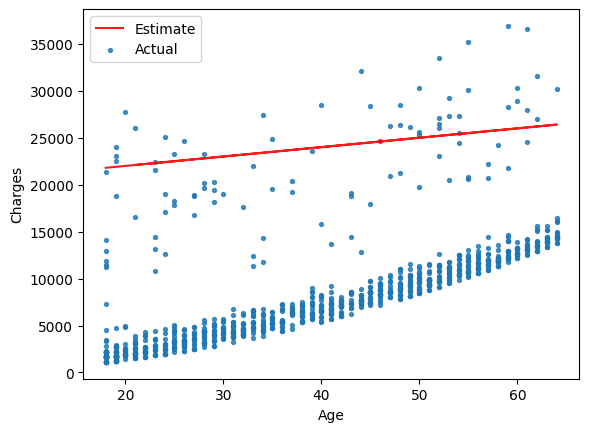

In [22]:
try_parameters(non_smoker_df, w=100, b=20000)

**Спостереження**:

1) При виборі таких параметрів, бачимо, що лінія бере свій початок около значення 20000 та має невисокий кут нахилу. В цілому ця лінія не відображає тренд залежності витрат від віку, бо згідно графіку розсіювання чітко видно, що обсяг медичних витрат збільшується зі збільшенням віку. А також лінія розміщена дуже далеко від основної сукупності точок.

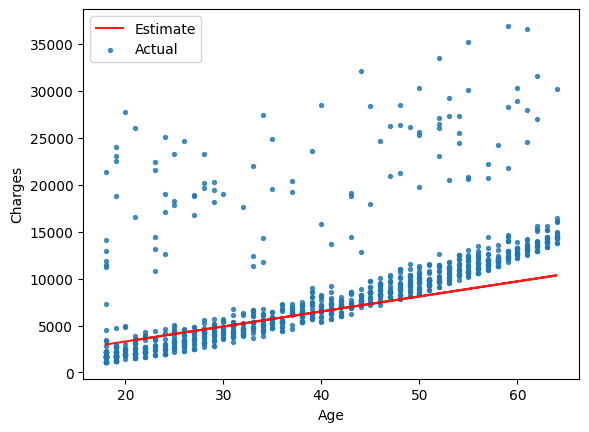

In [20]:
try_parameters(non_smoker_df, w=160, b=100)

**Спостереження**:

1) При виборі таких параметрів, бачимо, що лінія вже має вищий кут нахилу та в цілому відображає тренд зростання витрат в залежності від віку. Але на графіку розсіювання у нас чітко видно дві хмари точок, і ця лінія дуже близько розташована до найнижчої сукупності медичних витрат, але не враховує верхні значення.

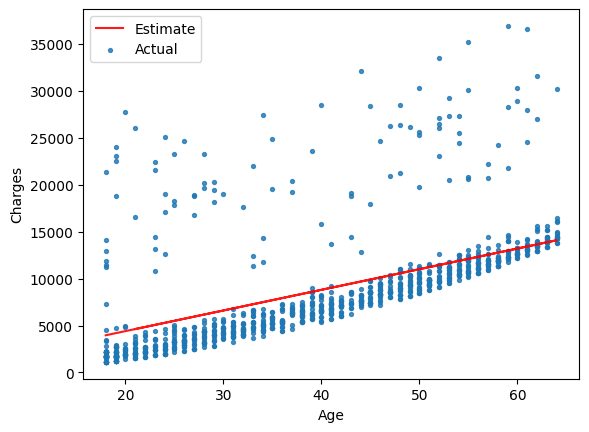

In [46]:
try_parameters(non_smoker_df, w=220, b=0)

**Спостереження**:

1) При виборі таких параметрів, бачимо, лінія відображає тренд зростання медичних витрат у залежності від віку та розташована таким чином, щоб враховувати відстань до сукупності нижчих та верхніх значень витрат.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [28]:
import numpy as np

In [37]:
def rmse_calc(target_value, independent_value, w, b, data):
  actual = data[target_value]
  predicted = data[independent_value]*w + b
  rmse = np.sqrt(np.mean(np.square(predicted-actual)))
  return rmse.round(2)

In [38]:
rmse_calc(target_value='charges', independent_value='age', w=100, b=20000, data = non_smoker_df)

16360.44

In [39]:
rmse_calc(target_value='charges', independent_value='age', w=160, b=100, data = non_smoker_df)

5305.63

In [56]:
rmse_calc(target_value='charges', independent_value='age', w=220, b=0, data = non_smoker_df)

4715.34

При значення параметрів w=220 та b=0, rmse є найменшим.
Основна стратегія знаходження накращого значення w та b, це по суті метод перебору:
1. Задаємо початкові значення w та b

2. Обчислюємо RMSE

3. Змінюємо значення w та b з фіксованим кроком - збільшуючи чи зменшуючи крок.

4. Порівнюємо нове значення з попереднім , намагаючись досягнути найменше значення RMSE